In [50]:
import re
import argparse
import matplotlib.pyplot as plt
import numpy as np
import os

def parse_stat_file(filename, num_requests=None):
    """Parse vLLM stats file and extract TTFT, ITL, and TPOT metrics."""
    with open(filename, 'r') as f:
        content = f.read()
    
    # Extract TTFT values
    ttft_values = []
    ttft_matches = re.findall(r'ttft:\[(.*?)\]', content)
    for match in ttft_matches:
        values = [float(x.strip()) for x in match.split(',')]
        ttft_values.extend(values)
    
    # Auto-detect num_requests if not provided
    if num_requests is None:
        num_requests = len(ttft_values)
    
    # Extract ITL values
    itl_values = [None] * num_requests
    itl_matches = re.findall(r'itl_(\d+):(.*?)(?:\n|$)', content)
    for idx_str, val_str in itl_matches:
        request_num = int(idx_str)
        if request_num < num_requests:
            itl_values[request_num] = float(val_str.strip())
    
    # Extract TPOT values (first value of each tpot list)
    tpot_values = []
    tpot_matches = re.findall(r'tpot:\[(.*?)\]', content)
    for match in tpot_matches:
        values = [float(x.strip()) for x in match.split(',')]
        if values:
            tpot_values.append(values[0])
    
    # Limit to the specified number of requests
    ttft_values = ttft_values[:num_requests]
    tpot_values = tpot_values[:num_requests]
    
    return ttft_values, itl_values, tpot_values

def plot_metrics(ttft_values, itl_values, tpot_values, filename):
    """Create plots for TTFT, ITL, and TPOT metrics."""
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    
    # Plot TTFT
    axes[0].plot(range(1, len(ttft_values) + 1), ttft_values, 'o', color='blue')
    axes[0].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[0].set_title('Time to First Token (TTFT)')
    axes[0].set_xlabel('Request Number')
    axes[0].set_ylabel('Time (seconds)')
    axes[0].grid(True)
    
    # Plot ITL
    x_vals = []
    y_vals = []
    for i, val in enumerate(itl_values):
        if val is not None:
            x_vals.append(i + 1)
            y_vals.append(val)
    
    axes[1].plot(x_vals, y_vals, 'o', color='green')
    axes[1].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[1].set_title('Inter-Token Latency (ITL)')
    axes[1].set_xlabel('Request Number')
    axes[1].set_ylabel('Time (seconds)')
    axes[1].grid(True)
    
    # Plot TPOT
    axes[2].plot(range(1, len(tpot_values) + 1), tpot_values, 'o', color='red')
    axes[2].set_xticks(np.arange(0, len(ttft_values) ,5))
    axes[2].set_title('Throughput Over Time (TPOT)')
    axes[2].set_xlabel('Request Number')
    axes[2].set_ylabel('Time (seconds)')
    axes[2].grid(True)
    
    plt.tight_layout()
    
    # Save the plot
    output_file = os.path.splitext(filename)[0] + "_plot.png"
    plt.savefig(output_file)
    print(f"Plot saved as: {output_file}")
    
    return fig

def print_statistics(ttft_values, itl_values, tpot_values):
    """Print summary statistics for each metric."""
    print("\nSummary Statistics:")
    print("-" * 50)
    
    # TTFT stats
    print(f"TTFT: min={min(ttft_values):.6f}s, max={max(ttft_values):.6f}s, " 
          f"avg={np.mean(ttft_values):.6f}s")
    
    # ITL stats
    valid_itl = [v for v in itl_values if v is not None]
    if valid_itl:
        print(f"ITL:  min={min(valid_itl):.6f}s, max={max(valid_itl):.6f}s, "
              f"avg={np.mean(valid_itl):.6f}s")
    else:
        print("ITL:  No valid data")
    
    # TPOT stats
    if tpot_values:
        print(f"TPOT: min={min(tpot_values):.6f}s, max={max(tpot_values):.6f}s, "
              f"avg={np.mean(tpot_values):.6f}s")
    else:
        print("TPOT: No valid data")

In [51]:
def mai(filename,num_requests):

    # Parse the file
    ttft_values, itl_values, tpot_values = parse_stat_file(
        filename, num_requests
    )
    
    num_requests = len(ttft_values)
    print(f"Processing {num_requests} requests from file: {filename}")
    
    # Print statistics
    print_statistics(ttft_values, itl_values, tpot_values)
    
    # Create and display the plots
    fig = plot_metrics(ttft_values, itl_values, tpot_values, filename)
    plt.show()

Processing 20 requests from file: /home/hkngae/vllm/fypStats/local/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.257003s, max=0.272074s, avg=0.261270s
ITL:  min=0.024608s, max=0.025001s, avg=0.024960s
TPOT: min=0.019576s, max=0.040015s, avg=0.024697s
Plot saved as: /home/hkngae/vllm/fypStats/local/stat_20_plot.png


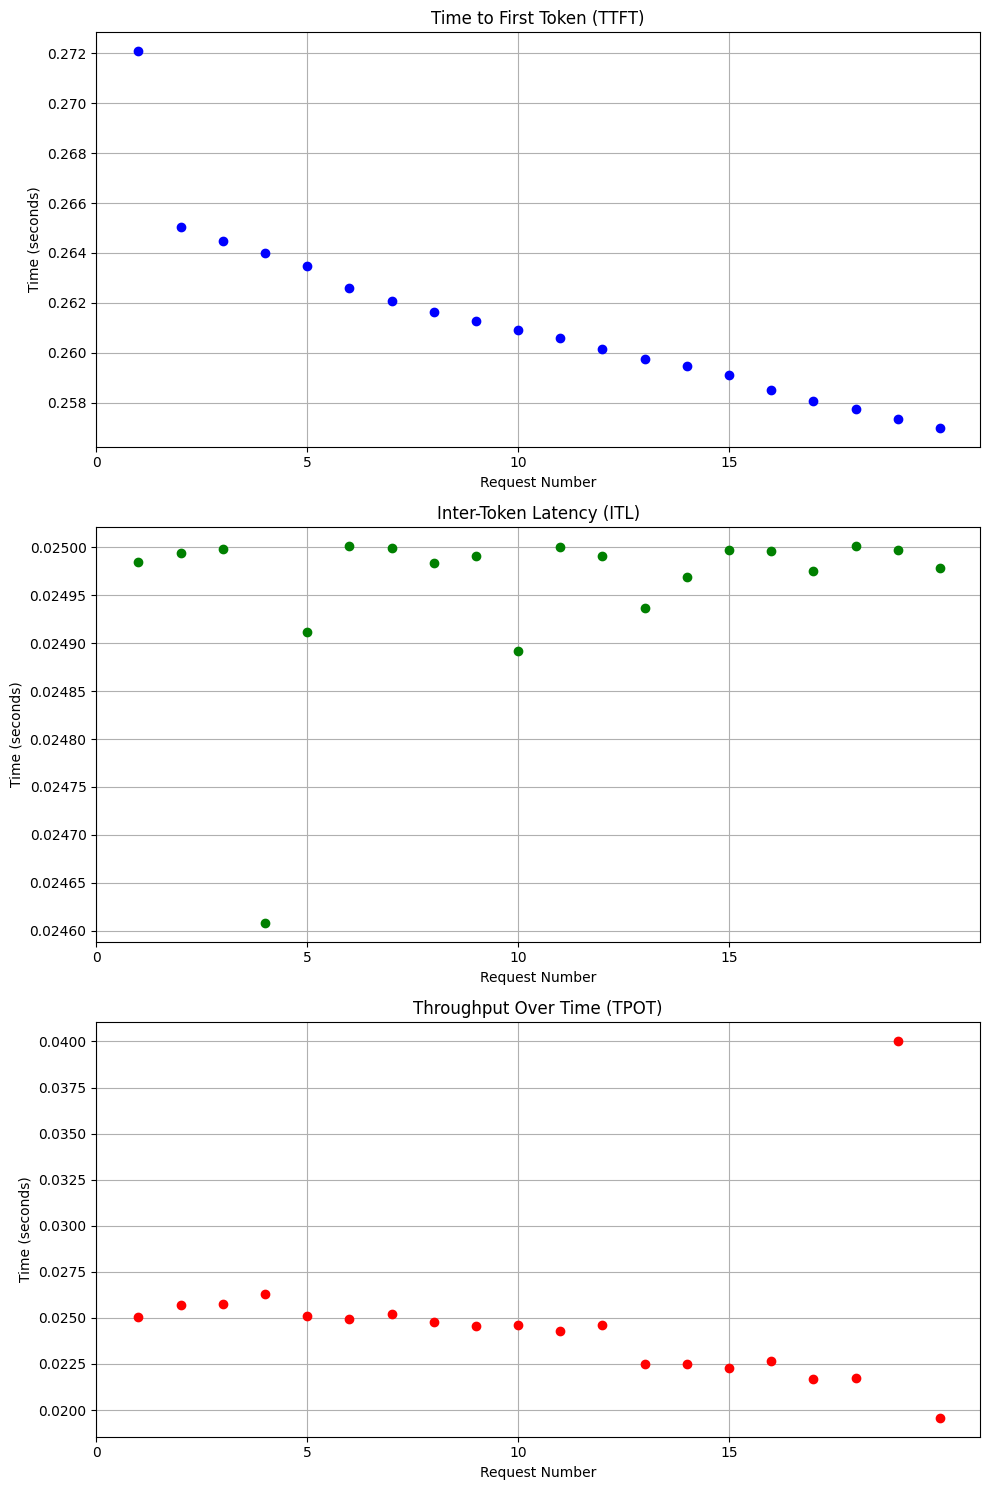

In [52]:
filename = "/home/hkngae/vllm/fypStats/local/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/local/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.367670s, max=0.393008s, avg=0.375846s
ITL:  min=0.029763s, max=0.030043s, avg=0.029942s
TPOT: min=0.019595s, max=0.039995s, avg=0.027223s
Plot saved as: /home/hkngae/vllm/fypStats/local/stat_40_plot.png


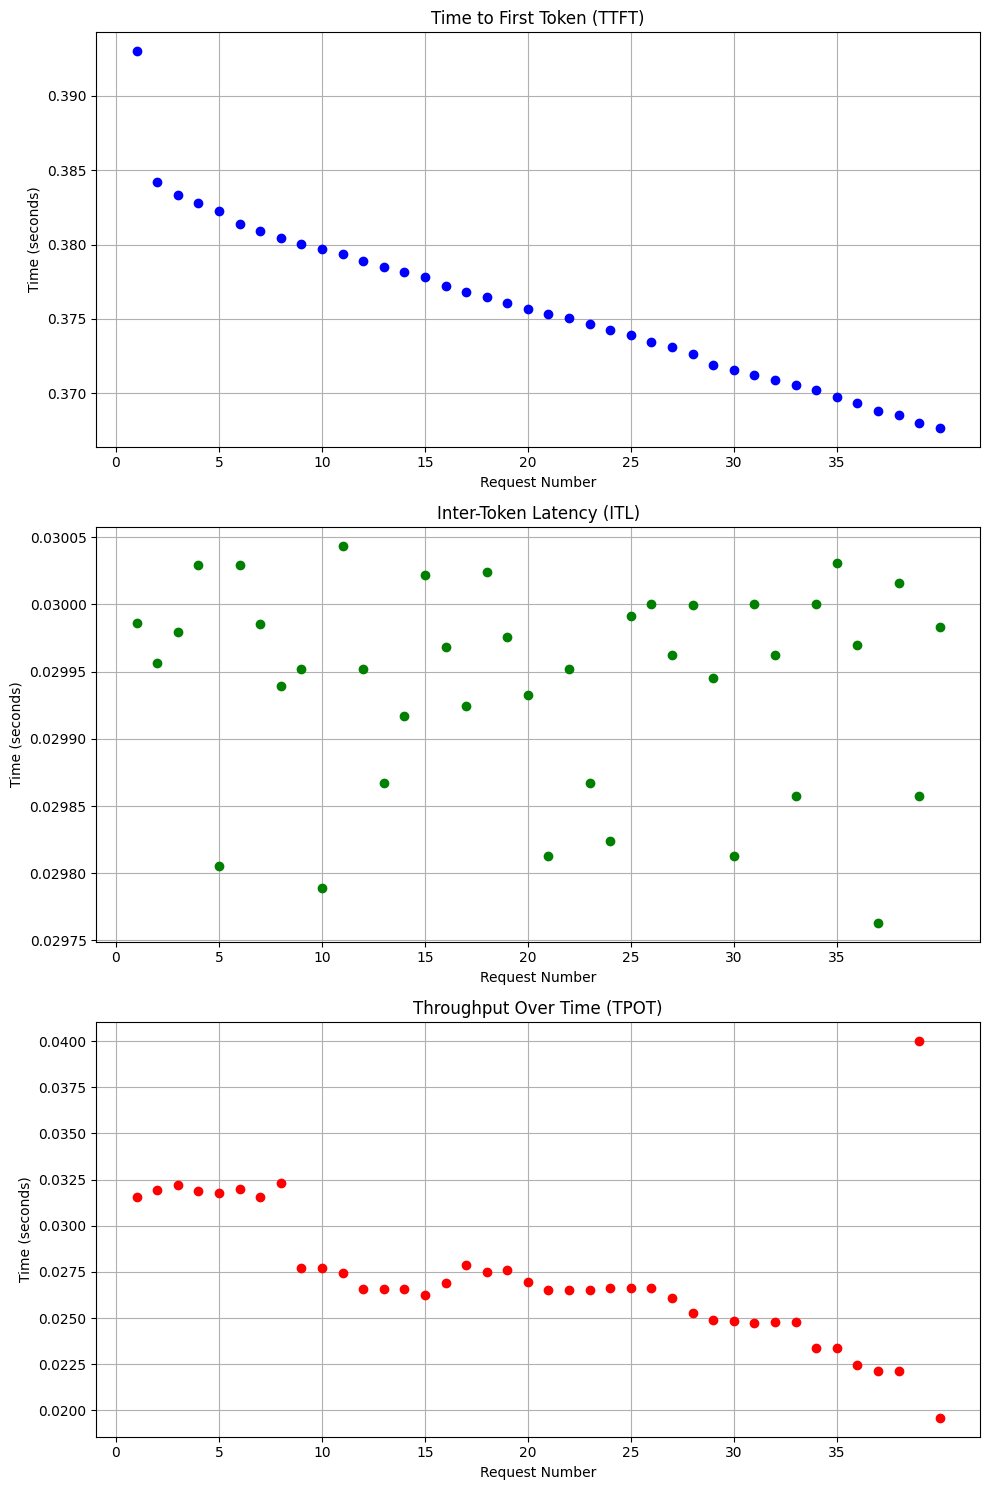

In [53]:
filename = "/home/hkngae/vllm/fypStats/local/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/local/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.666479s, max=0.698932s, avg=0.676256s
ITL:  min=0.040934s, max=0.043230s, avg=0.042827s
TPOT: min=0.019662s, max=0.046832s, avg=0.033613s
Plot saved as: /home/hkngae/vllm/fypStats/local/stat_80_plot.png


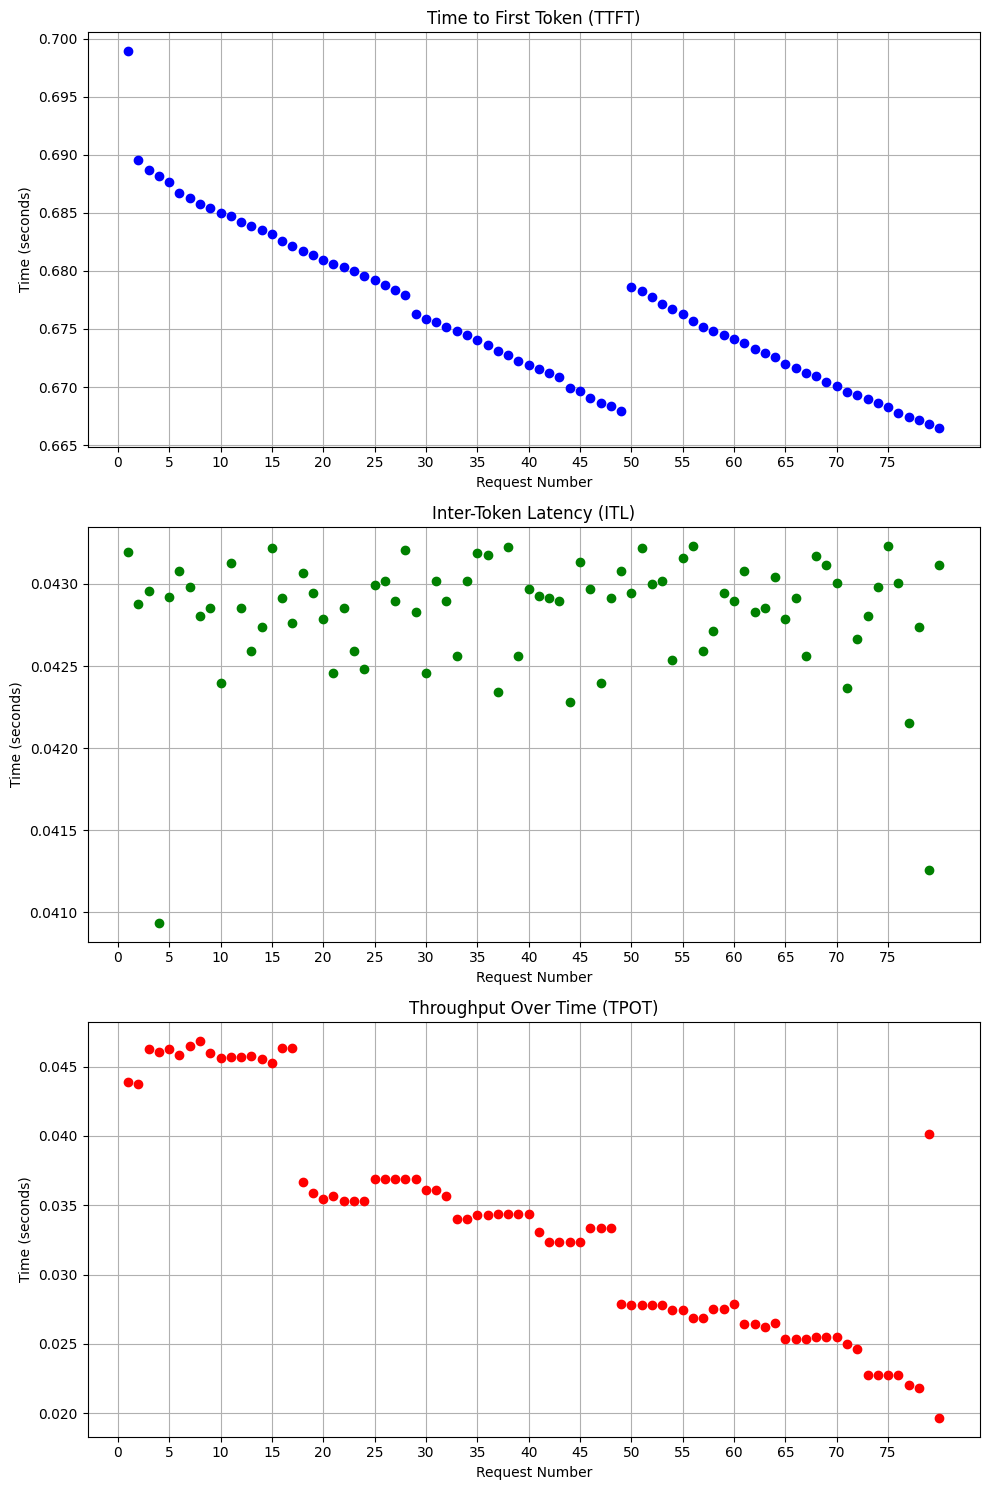

In [54]:
filename = "/home/hkngae/vllm/fypStats/local/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/local/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.696719s, max=31.477377s, avg=14.945020s
ITL:  min=0.040748s, max=0.044704s, avg=0.043339s
TPOT: min=0.019699s, max=0.084499s, avg=0.043620s
Plot saved as: /home/hkngae/vllm/fypStats/local/stat_160_plot.png


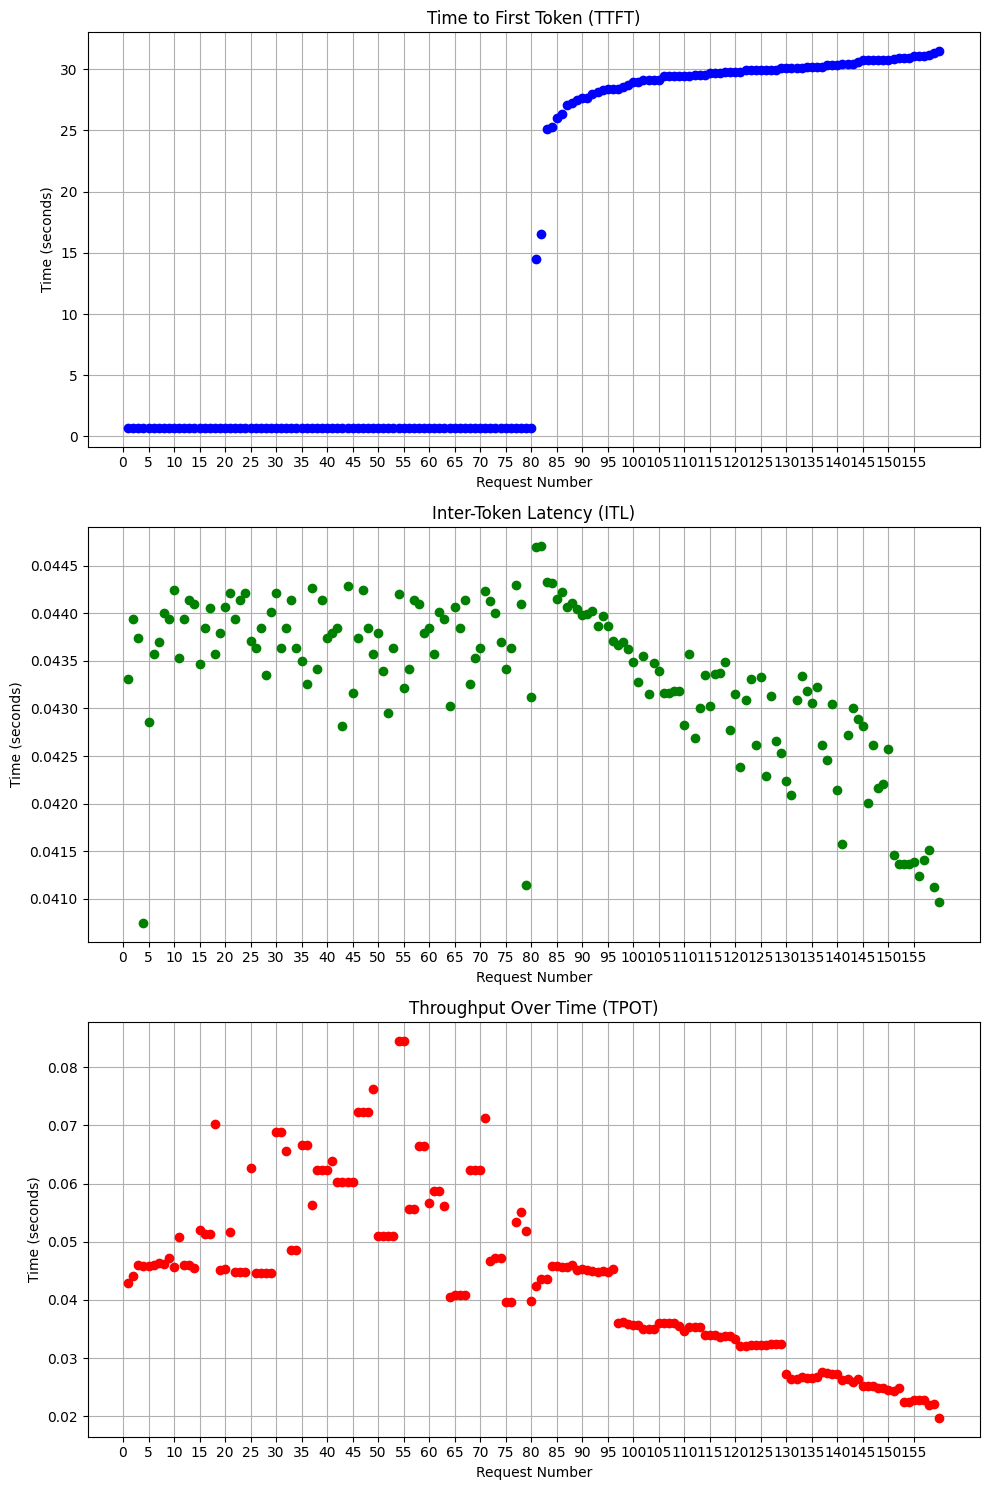

In [55]:
filename = "/home/hkngae/vllm/fypStats/local/stat_160.txt"
num_requests = 160
mai(filename, num_requests)

Processing 20 requests from file: /home/hkngae/vllm/fypStats/remote/stat_20.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.229544s, max=0.243901s, avg=0.232419s
ITL:  min=0.024331s, max=0.024331s, avg=0.024331s
TPOT: min=0.024130s, max=0.024130s, avg=0.024130s
Plot saved as: /home/hkngae/vllm/fypStats/remote/stat_20_plot.png


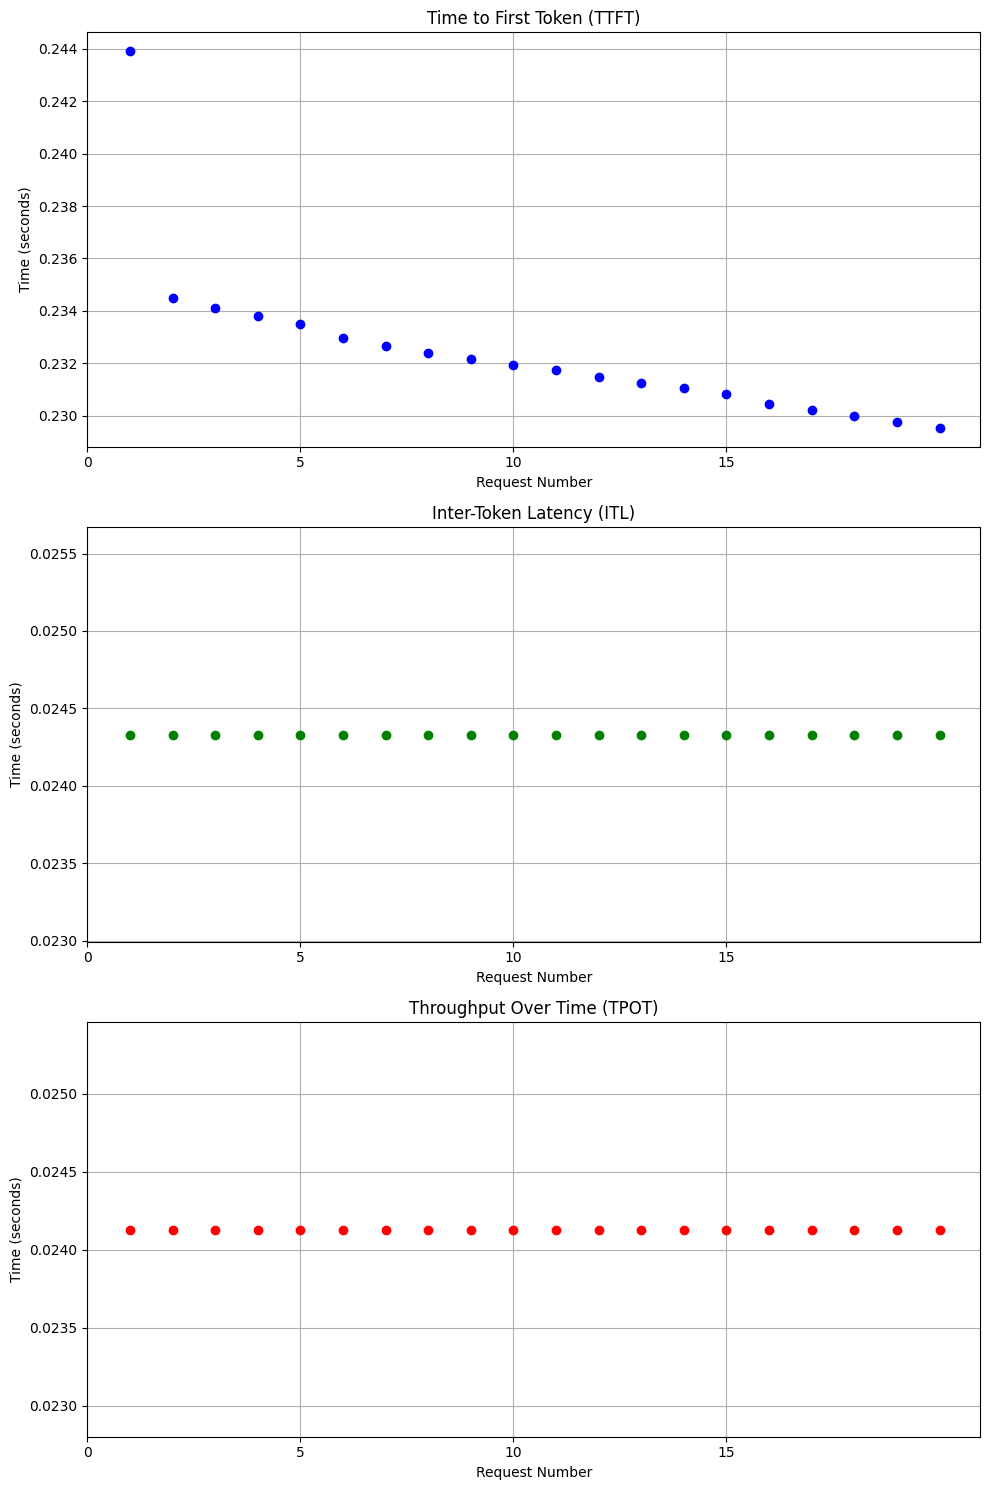

In [56]:
filename = "/home/hkngae/vllm/fypStats/remote/stat_20.txt"
num_requests = 20
mai(filename, num_requests)

Processing 40 requests from file: /home/hkngae/vllm/fypStats/remote/stat_40.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.445928s, max=0.464601s, avg=0.450903s
ITL:  min=0.028311s, max=0.028311s, avg=0.028311s
TPOT: min=0.027766s, max=0.027766s, avg=0.027766s


Plot saved as: /home/hkngae/vllm/fypStats/remote/stat_40_plot.png


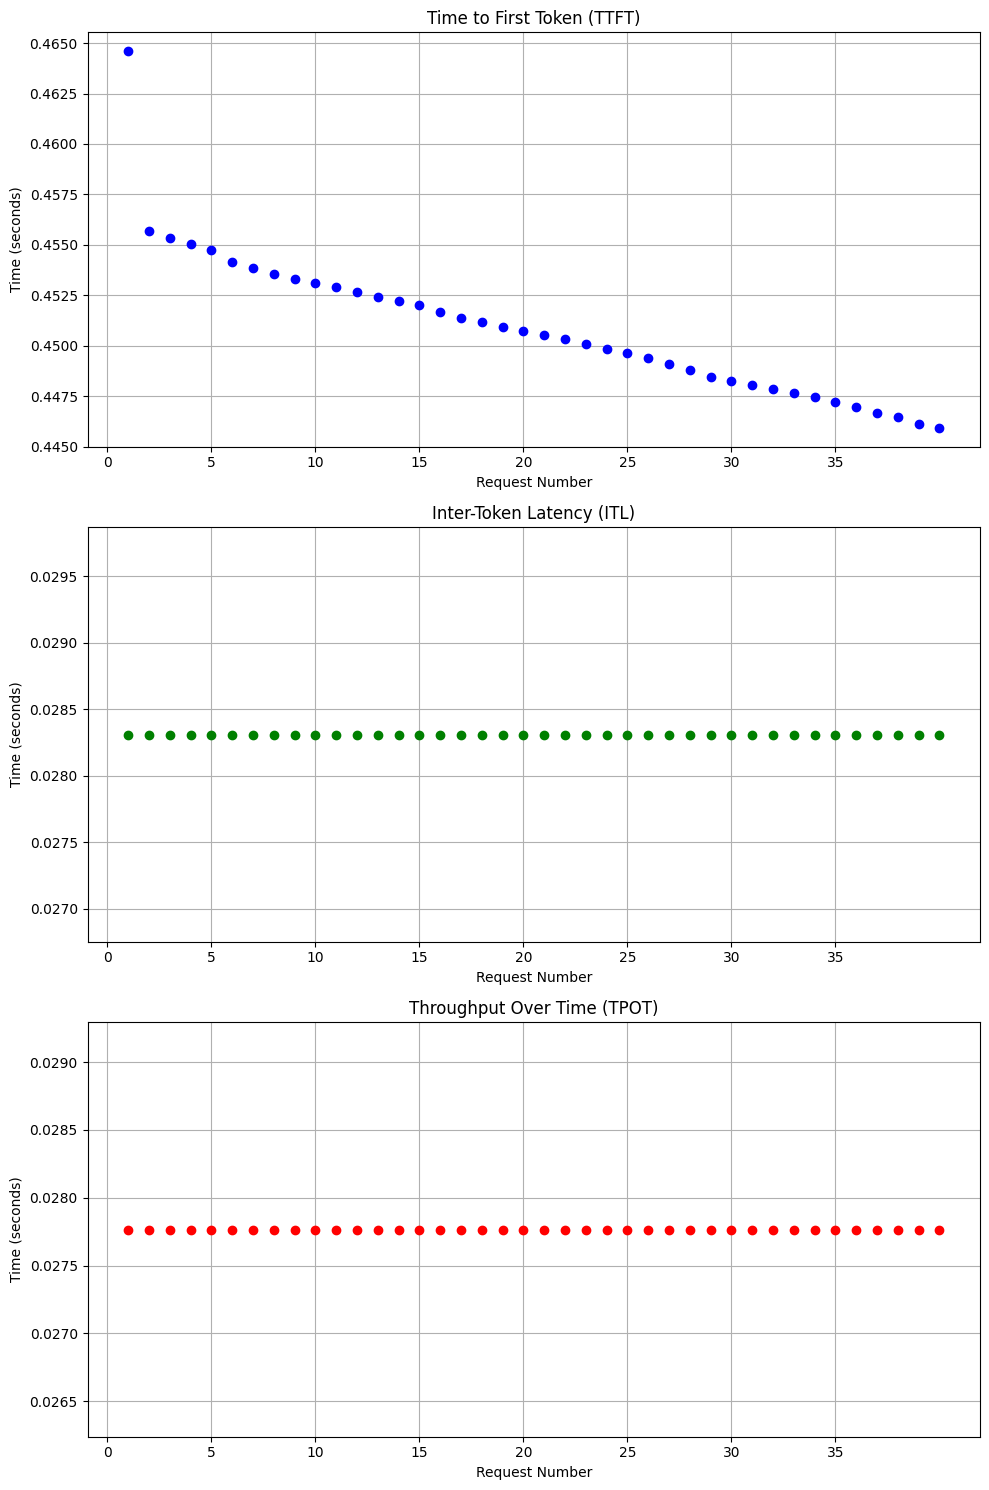

In [57]:
filename = "/home/hkngae/vllm/fypStats/remote/stat_40.txt"
num_requests = 40
mai(filename, num_requests)

Processing 80 requests from file: /home/hkngae/vllm/fypStats/remote/stat_80.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.669498s, max=0.690306s, avg=0.675913s
ITL:  min=0.039623s, max=0.039623s, avg=0.039623s
TPOT: min=0.038391s, max=0.038391s, avg=0.038391s
Plot saved as: /home/hkngae/vllm/fypStats/remote/stat_80_plot.png


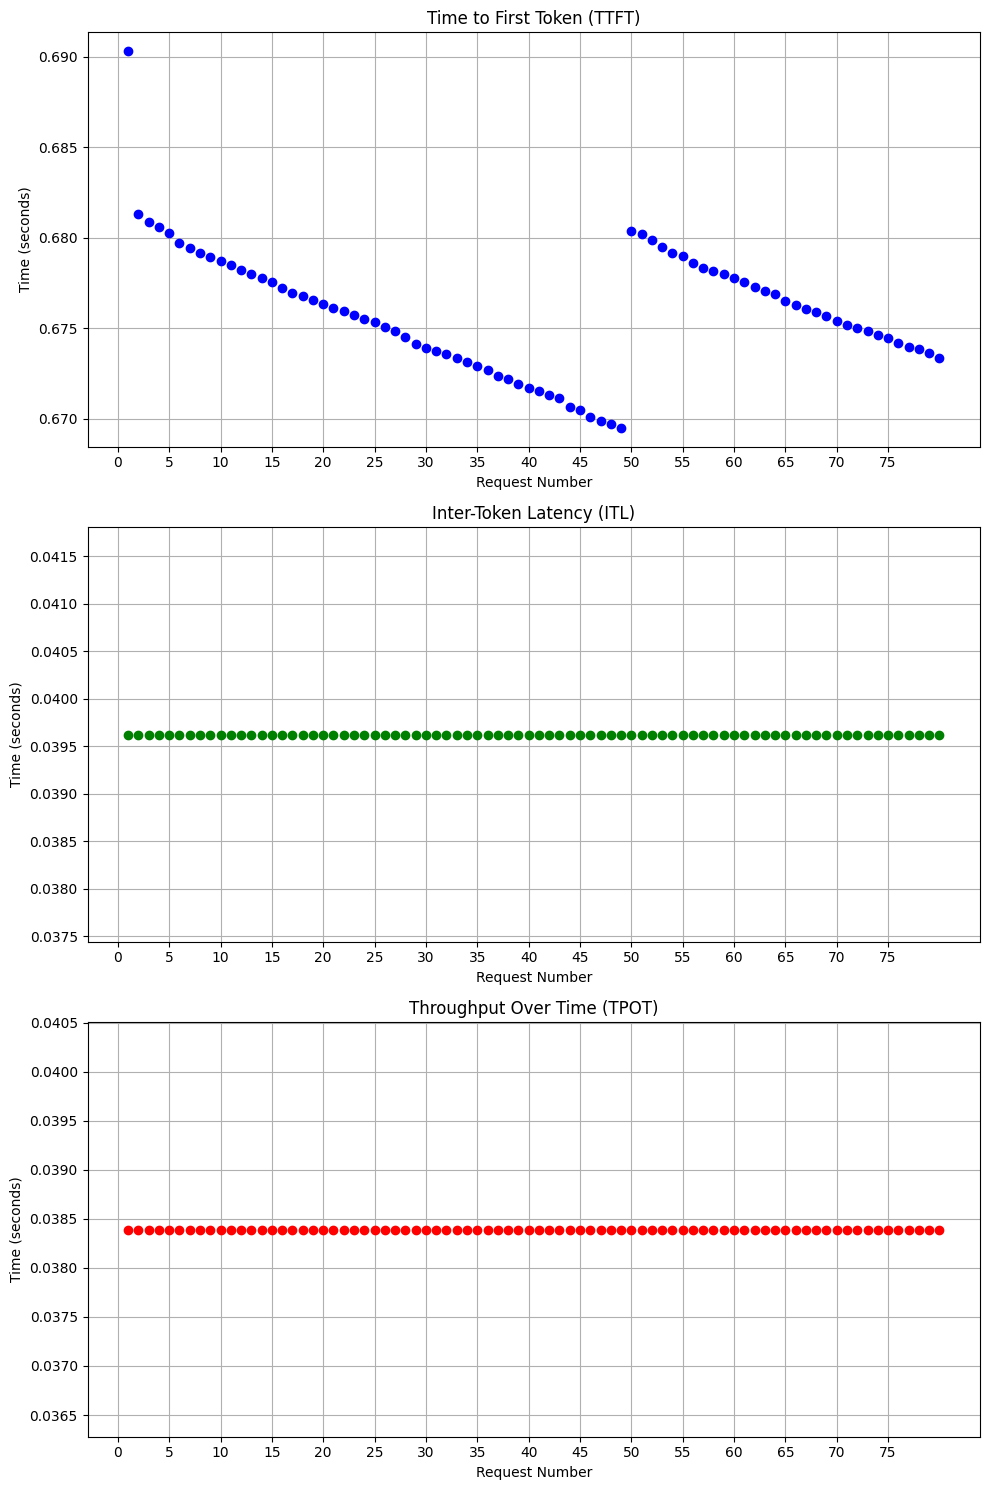

In [58]:
filename = "/home/hkngae/vllm/fypStats/remote/stat_80.txt"
num_requests = 80
mai(filename, num_requests)

Processing 160 requests from file: /home/hkngae/vllm/fypStats/remote/stat_160.txt

Summary Statistics:
--------------------------------------------------
TTFT: min=0.694657s, max=1.923614s, avg=1.309667s
ITL:  min=0.038212s, max=0.040017s, avg=0.039114s
TPOT: min=0.038256s, max=0.038286s, avg=0.038271s
Plot saved as: /home/hkngae/vllm/fypStats/remote/stat_160_plot.png


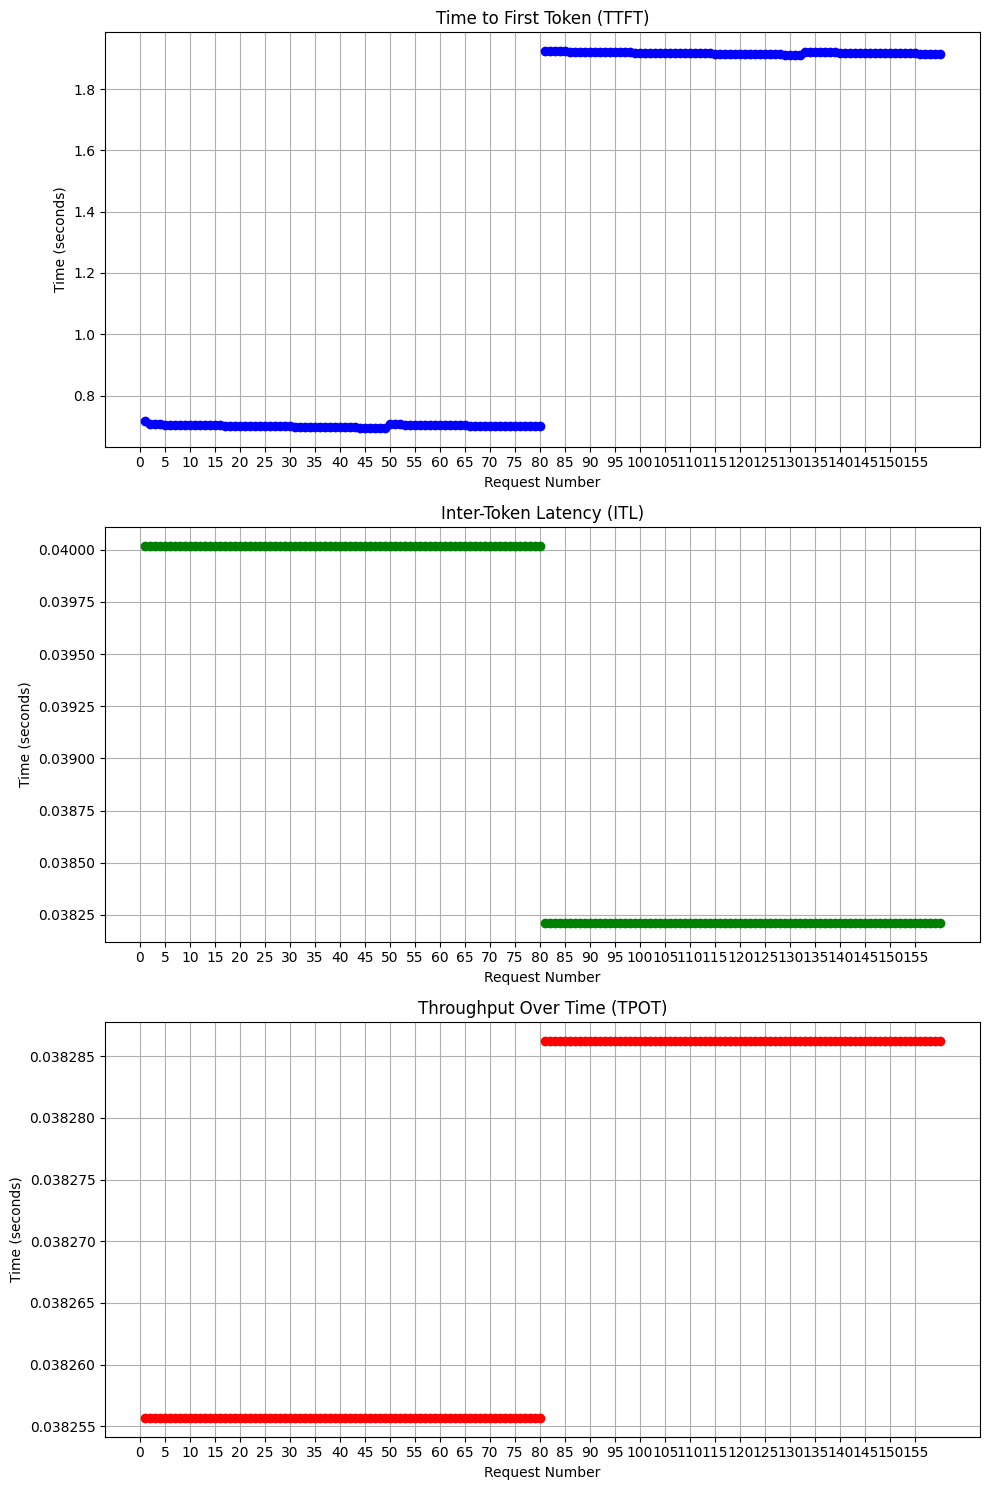

In [59]:
filename = "/home/hkngae/vllm/fypStats/remote/stat_160.txt"
num_requests = 160
mai(filename, num_requests)